In [ ]:
!pip install ipywidgets ipykernel --upgrade
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np
from ipycanvas import Canvas, hold_canvas
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import cv2

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert notebook run script server troubleshoot
trust

Jupyter command `jupyter-nbextension` not found.
usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--pa

In [6]:
import ipywidgets as widgets
widgets.IntSlider(value=42)

IntSlider(value=42)

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28*28)).astype('float32') / 255.
x_test = x_test.reshape((-1, 28*28)).astype('float32') / 255.
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

model1 = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,)),
    layers.Dense(10, activation='softmax')
])
model1.compile(loss='mse', optimizer=SGD(0.01), metrics=['accuracy'],)
model1.fit(x_train, y_train_cat, epochs=50, batch_size=128, verbose=0)
test_loss1, test_acc1 = model1.evaluate(x_test, y_test_cat)
print("MLP-SGD-MSE Test Accuracy:", test_acc1)

model2 = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,)),
    layers.Dense(10, activation='softmax')
])
model2.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model2.fit(x_train, y_train_cat, epochs=50, batch_size=128, verbose=0)
test_loss2, test_acc2 = model2.evaluate(x_test, y_test_cat)
print("MLP-Adam-MSE Test Accuracy:", test_acc2)

(x_train_cnn, y_train_cnn), (x_test_cnn, y_test_cnn) = mnist.load_data()
x_train_cnn = x_train_cnn.reshape((-1, 28, 28, 1)).astype('float32') / 255.
x_test_cnn = x_test_cnn.reshape((-1, 28, 28, 1)).astype('float32') / 255.
y_train_cnn = to_categorical(y_train_cnn, 10)
y_test_cnn = to_categorical(y_test_cnn, 10)

model3 = models.Sequential([
    layers.Conv2D(6, kernel_size=(5,5), activation='relu', input_shape=(28, 28, 1), padding='same'),
    layers.MaxPooling2D(pool_size=(2,2), strides=2),
    layers.Conv2D(16, kernel_size=(5,5), activation='relu', padding='valid'),
    layers.MaxPooling2D(pool_size=(2,2), strides=2),
    layers.Conv2D(120, kernel_size=(5,5), activation='relu', padding='valid'),
    layers.Flatten(),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model3.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model3.fit(x_train_cnn, y_train_cnn, epochs=30, batch_size=128, verbose=0)
test_loss3, test_acc3 = model3.evaluate(x_test_cnn, y_test_cnn)
print("CNN-LeNet5 Test Accuracy:", test_acc3)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


c:\Users\dhfgo\anaconda3\envs\tf210\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8779 - loss: 0.0207
MLP-SGD-MSE Test Accuracy: 0.8950999975204468
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9822 - loss: 0.0030
MLP-Adam-MSE Test Accuracy: 0.9840999841690063


c:\Users\dhfgo\anaconda3\envs\tf210\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9868 - loss: 0.0659
CNN-LeNet5 Test Accuracy: 0.9896000027656555


## Test 결과 시각화

In [3]:
def visualize_test_predictions(model, x_test, y_test, input_shape, model_name="Model"):
    label_indices = {i: None for i in range(10)}
    for idx, label in enumerate(np.argmax(y_test, axis=1)):
        if label_indices[label] is None:
            label_indices[label] = idx
        if all(v is not None for v in label_indices.values()):
            break

    sample_indices = [label_indices[i] for i in range(10)]
    images = [x_test[i] for i in sample_indices]
    true_labels = [np.argmax(y_test[i]) for i in sample_indices]

    if input_shape == (784,):
        inputs = np.array([img.reshape(784) for img in images])
    elif input_shape == (28, 28, 1):
        inputs = np.array([img.reshape(28, 28, 1) for img in images])
    else:
        raise ValueError("Unsupported input shape.")

    predictions = model.predict(inputs)
    pred_labels = np.argmax(predictions, axis=1)

    plt.figure(figsize=(15, 3))
    for i in range(10):
        plt.subplot(1, 10, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"L:{true_labels[i]}\nP:{pred_labels[i]}")
        plt.axis('off')
    plt.suptitle(f"{model_name} - Predictions on 0~9 digits", fontsize=14)
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


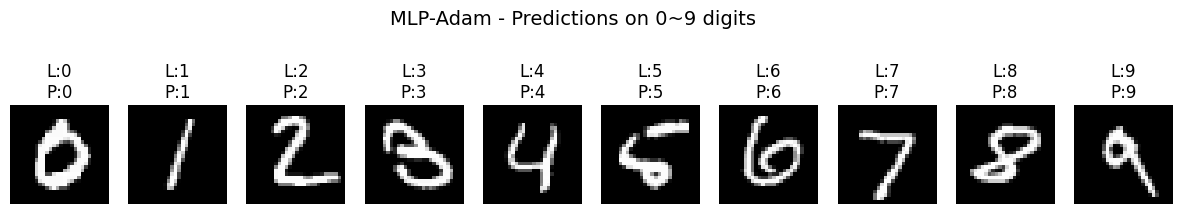

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


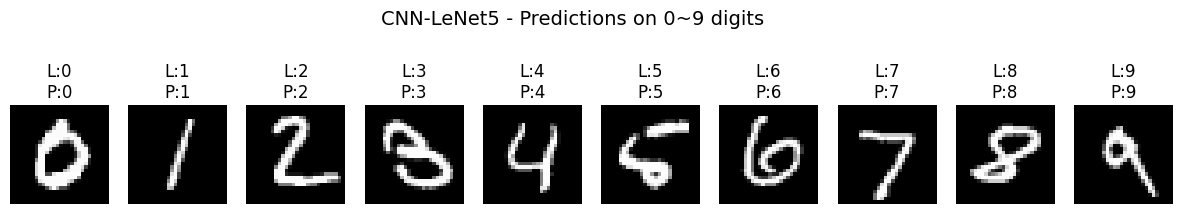

In [4]:
# MLP model (model1 or model2)
visualize_test_predictions(
    model=model2,
    x_test=x_test,
    y_test=y_test_cat,
    input_shape=(784,),
    model_name="MLP-Adam"
)

# CNN model (model3)
visualize_test_predictions(
    model=model3,
    x_test=x_test_cnn,
    y_test=y_test_cnn,
    input_shape=(28, 28, 1),
    model_name="CNN-LeNet5"
)

## 손글씨 직접 그리고 Test

In [ ]:
from ipycanvas import Canvas, hold_canvas
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import cv2
import matplotlib.pyplot as plt

canvas = Canvas(width=280, height=280)
canvas.layout.border = '1px solid black'

clear_button = widgets.Button(description="Clear")
predict_button = widgets.Button(description="Predict")
output_label = widgets.Label(value="Draw a digit and click Predict.")

def clear_canvas(event=None):
    canvas.clear()
    output_label.value = "Canvas cleared. Draw a digit and click Predict."

def predict_digit(event=None):
    img_data = np.array(canvas.get_image_data(0, 0, 280, 280))[:, :, 3]  # alpha channel
    img = cv2.resize(img_data, (28, 28)).astype("float32") / 255.0
    img = 1.0 - img  # 흰 배경 → 0, 검정 선 → 1
    input_img = img.reshape(1, 28, 28, 1)
    pred_probs = model.predict(input_img)
    pred_label = np.argmax(pred_probs)

    output_label.value = f"Predicted: {pred_label} (confidence: {pred_probs[0][pred_label]:.2f})"

    # 확률 막대 그래프 출력
    plt.figure(figsize=(6, 3))
    plt.bar(range(10), pred_probs[0])
    plt.title("Prediction Probabilities")
    plt.xlabel("Digit")
    plt.ylabel("Probability")
    plt.show()

clear_button.on_click(clear_canvas)
predict_button.on_click(predict_digit)

display(widgets.HBox([clear_button, predict_button]), canvas, output_label)

Canvas(height=280, layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right=…

Label(value='Draw a digit and click Predict.')

Support for third party widgets will remain active for the duration of the session. To disable support: